# Financial Engineering Assignment

## This cell block has all common functions that are required

key things to understand :
- sharpe Ratio: A higher Sharpe Ratio indicates a better risk-adjusted return. It means that the investment is generating more return per unit of risk taken. Conversely, a lower Sharpe Ratio suggests that the investment is not adequately compensating investors for the risk taken.
- CML :  CML stands for the Capital Market Line. The Capital Market Line is a graphical representation of the CAPM and depicts the relationship between expected return and systematic risk (beta) for a portfolio of all risky assets, including the market portfolio and a risk-free asset.
- SML stands for the Security Market Line. The Security Market Line is a graphical representation of the CAPM and depicts the relationship between expected return and systematic risk (beta) for individual securities or portfolios.
- Markowitz Optimization Theory is a portfolio construction method that aims to maximize returns for a given level of risk or minimize risk for a given level of return by diversifying investments across different assets, taking into account their expected returns and covariance.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to generate portfolios and simulate the efficient frontier
def generate_portfolios(mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0):
    num_assets = len(mean_returns)
    results = np.zeros((4, num_portfolios))  # Added another row for Sharpe Ratio
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev  # Sharpe Ratio
    return results, weights_record

# Function to find the portfolio with the highest Sharpe Ratio
def max_sharpe_ratio_portfolio(results, weights_record):
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = weights_record[max_sharpe_idx]
    return sdp, rp, max_sharpe_allocation

# Function to find the portfolio with the minimum volatility
def min_volatility_portfolio(results, weights_record):
    min_vol_idx = np.argmin(results[0])
    sdp, rp = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = weights_record[min_vol_idx]
    return sdp, rp, min_vol_allocation

# Helper function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return volatility, returns

 # Adds Log function to the Data frame Optionally, remove the first row which will be NaN
def calculate_log_returns(prices):
    log_returns = np.log(prices / prices.shift(1))
    return log_returns.dropna() 



## ALL PLOTTING FUNCTIONS

In [2]:
# PLOTS

import matplotlib.pyplot as plt

def plot_efficient_frontier(results):
    plt.scatter(results[0], results[1], c=results[2], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')
    plt.show()

def plot_log_returns(log_returns):
    plt.figure(figsize=(14, 7))
    for c in log_returns.columns.values:
        plt.plot(log_returns.index, log_returns[c], label=c)
    plt.title('Asset Log Returns')
    plt.xlabel('Date')
    plt.ylabel('Log return')
    plt.legend(loc='best')
    plt.show()

def plot_efficient_frontier_with_highlights(results, max_sharpe_allocation, min_vol_allocation):
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0], results[1], c=results[2], cmap='viridis', label='Efficient Frontier')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Efficient Frontier with Highlighted Portfolios')
    
    # Highlight the maximum Sharpe ratio portfolio
    max_sharpe_volatility = max_sharpe_allocation[0]
    max_sharpe_return = max_sharpe_allocation[1]
    plt.scatter(max_sharpe_volatility, max_sharpe_return, color='red', marker='*', s=500, label='Maximum Sharpe Ratio Portfolio')
    
    # Highlight the minimum volatility portfolio
    min_vol_volatility = min_vol_allocation[0]
    min_vol_return = min_vol_allocation[1]
    plt.scatter(min_vol_volatility, min_vol_return, color='blue', marker='*', s=500, label='Minimum Volatility Portfolio')
    
    plt.legend(labelspacing=0.8)
    plt.show()


def plot_asset_performance(log_returns):
    """
    Plots the annualized return and annualized volatility for each asset in the log_returns DataFrame.

    Parameters:
    - log_returns: DataFrame containing log returns of assets.
    """
    # Calculate annualized return and annualized volatility
    annualized_return = log_returns.mean() * 252
    annualized_volatility = log_returns.std() * np.sqrt(252)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for i, txt in enumerate(annualized_return.index):
        plt.scatter(annualized_volatility[i], annualized_return[i], label=txt)
        plt.text(annualized_volatility[i], annualized_return[i], txt, fontsize=9)
    
    plt.title('Asset Performance: Return vs. Volatility')
    plt.xlabel('Annualized Volatility (Risk)')
    plt.ylabel('Annualized Return')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
def plot_portfolio_allocation(weights, title):
    # Ensure weights are normalized (sum to 1) if not already
    weights = [float(i)/sum(weights) for i in weights]
    
    plt.figure(figsize=(10, 7))
    plt.pie(weights, labels=asset_names, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

    

In [3]:
import pandas as pd


# Load the data
bond_eur = pd.read_csv('./Data/BOND_EUR Kraken Historical Data.csv', index_col='Date', parse_dates=True)
crude_oil_wti = pd.read_csv('./Data/Crude Oil WTI Futures - Apr 24 (CLJ4).csv', index_col='Date', parse_dates=True)
india_bond = pd.read_csv('./Data/India 3-Month Bond Yield Historical Data.csv', index_col='Date', parse_dates=True)
namibia_bond = pd.read_csv('./Data/Namibia 3-Month Bond Yield Historical Data.csv', index_col='Date', parse_dates=True)
s_p_500 = pd.read_csv('./Data/S&P 500 (US500).csv', index_col='Date', parse_dates=True)
sbi_gold_etf = pd.read_csv('./Data/SBI Gold ETF (SBIG).csv', index_col='Date', parse_dates=True)
spdr_dow_jones = pd.read_csv('./Data/SPDR® Dow Jones Industrial Average ETF Trust (SPDR).csv', index_col='Date', parse_dates=True)
uk_10yr_gilt = pd.read_csv('./Data/UK 10 YR Gilt Futures Historical Data.csv', index_col='Date', parse_dates=True)
us_soybeans = pd.read_csv('./Data/US Soybeans Futures - Mar 24 (ZSH4).csv', index_col='Date', parse_dates=True)
us_wheat = pd.read_csv('./Data/US Wheat Futures - Mar 24 (ZWH4).csv', index_col='Date', parse_dates=True)

# Forward fill the missing values for each asset before combining them
bond_eur.ffill(inplace=True)
crude_oil_wti.ffill(inplace=True)
india_bond.ffill(inplace=True)
namibia_bond.ffill(inplace=True)
s_p_500.ffill(inplace=True)
sbi_gold_etf.ffill(inplace=True)
spdr_dow_jones.ffill(inplace=True)
uk_10yr_gilt.ffill(inplace=True)
us_soybeans.ffill(inplace=True)
us_wheat.ffill(inplace=True)

# Combine into a single DataFrame
prices = pd.concat([
    bond_eur['Price'], 
    crude_oil_wti['Price'], 
    india_bond['Price'], 
    namibia_bond['Price'], 
    s_p_500['Price'], 
    sbi_gold_etf['Price'], 
    spdr_dow_jones['Price'], 
    uk_10yr_gilt['Price'], 
    us_soybeans['Price'], 
    us_wheat['Price']
], axis=1)

# Rename columns
prices.columns = [
    'BOND_EUR', 
    'CRUDE_OIL_WTI', 
    'INDIA_BOND', 
    'NAMIBIA_BOND', 
    'S_P_500', 
    'SBI_GOLD_ETF', 
    'SPDR_DOW_JONES', 
    'UK_10YR_GILT', 
    'US_SOYBEANS', 
    'US_WHEAT'
]


prices = prices.apply(pd.to_numeric, errors='coerce')
# Apply interpolation to fill in any remaining gaps
prices.interpolate(method='linear', inplace=True)
# Check for non-overlapping dates
print(prices.count())  # This will show you the count of non-NaN values per column


BOND_EUR          107
CRUDE_OIL_WTI     107
INDIA_BOND        107
NAMIBIA_BOND      107
S_P_500           107
SBI_GOLD_ETF      107
SPDR_DOW_JONES    106
UK_10YR_GILT      107
US_SOYBEANS       107
US_WHEAT          107
dtype: int64


Number of rows in log_returns: 105


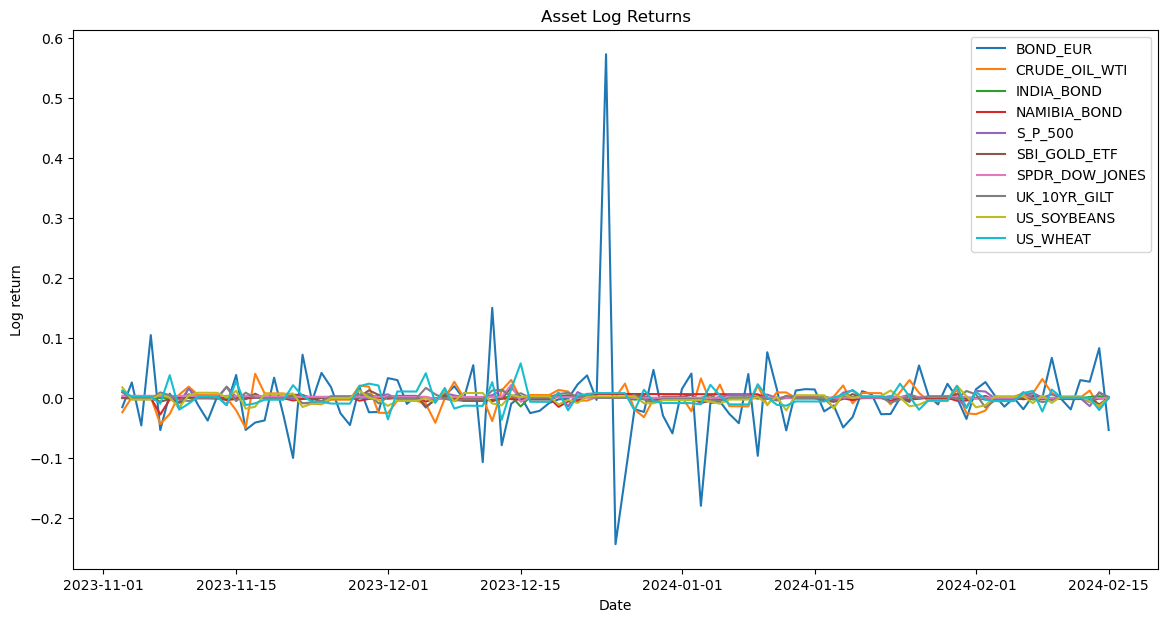

In [4]:
import matplotlib.pyplot as plt

# Plotting the log returns
log_returns = np.log(prices / prices.shift(1)).dropna()
print("Number of rows in log_returns:", len(log_returns))

# Proceed with further analysis such as plotting log returns, calculating mean returns and volatility, etc.

mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()
plot_log_returns(log_returns)



# INFERENCE FROM Log returns
- EURO bond has a very wide log return suggesting vert high volatility implying a higher risk.
- Crude oil sessms to be the second next

[0.00294335 0.00671905 0.0880763  0.08938465 0.24875326 0.20492818
 0.2347018  0.02908765 0.043687   0.05171876]


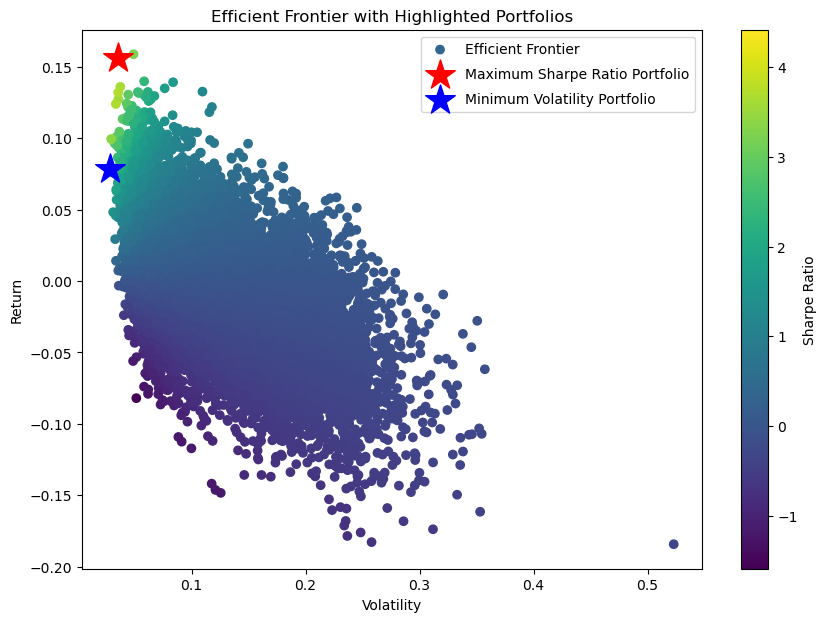

In [23]:
np.random.seed(76) 
results, weights_record = generate_portfolios(mean_returns, cov_matrix)
# Portfolio with the Highest Sharpe Ratio
sdp_max_sharpe, rp_max_sharpe, max_sharpe_allocation = max_sharpe_ratio_portfolio(results, weights_record)
print(max_sharpe_allocation)
# Portfolio with the Minimum Volatility
sdp_min_vol, rp_min_vol, min_vol_allocation = min_volatility_portfolio(results, weights_record)
# Adjust the parameters to include volatility and return values for the portfolios
max_sharpe_allocations = [sdp_max_sharpe, rp_max_sharpe]
min_vol_allocation = [sdp_min_vol, rp_min_vol]

plot_efficient_frontier_with_highlights(results, max_sharpe_allocations, min_vol_allocation)



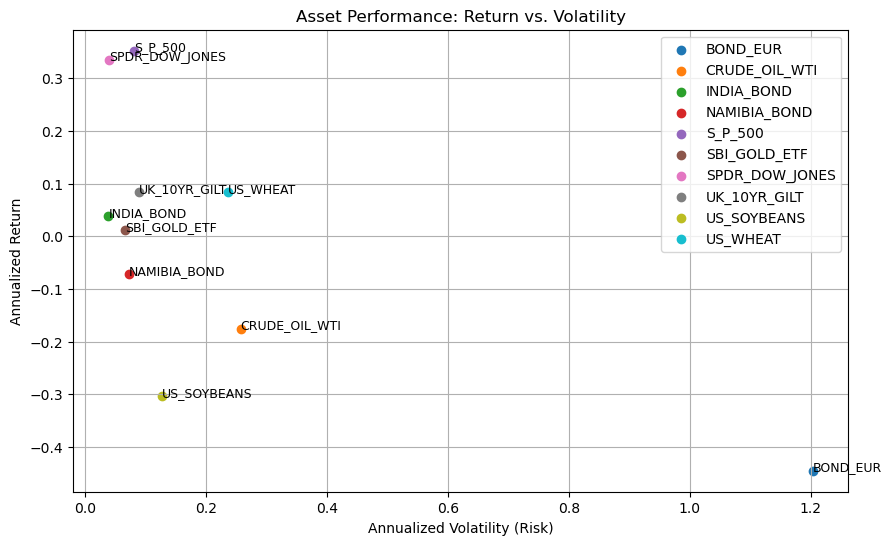

In [24]:
# Example usage with a hypothetical 'log_returns' DataFrame
plot_asset_performance(log_returns)


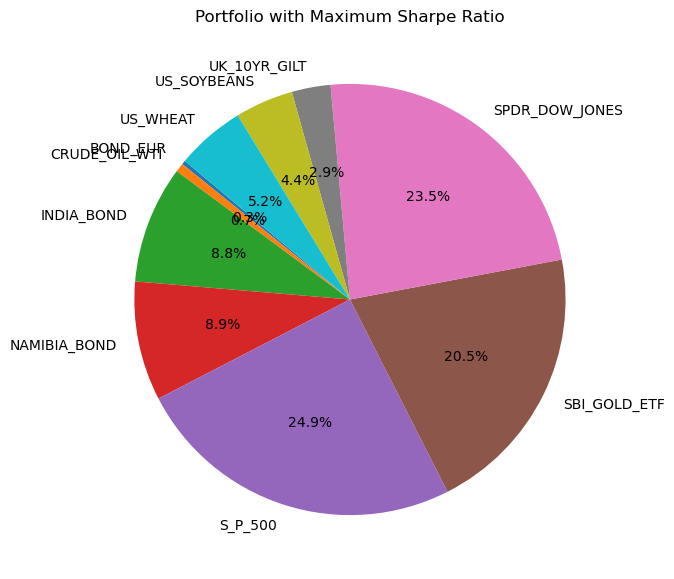

In [25]:
import matplotlib.pyplot as plt

# Assuming asset_names matches the order of assets in your weights_record
asset_names = prices.columns


# Plotting the pie charts for the optimal portfolios
plot_portfolio_allocation(max_sharpe_ratio_portfolio(results, weights_record)[2], 'Portfolio with Maximum Sharpe Ratio')

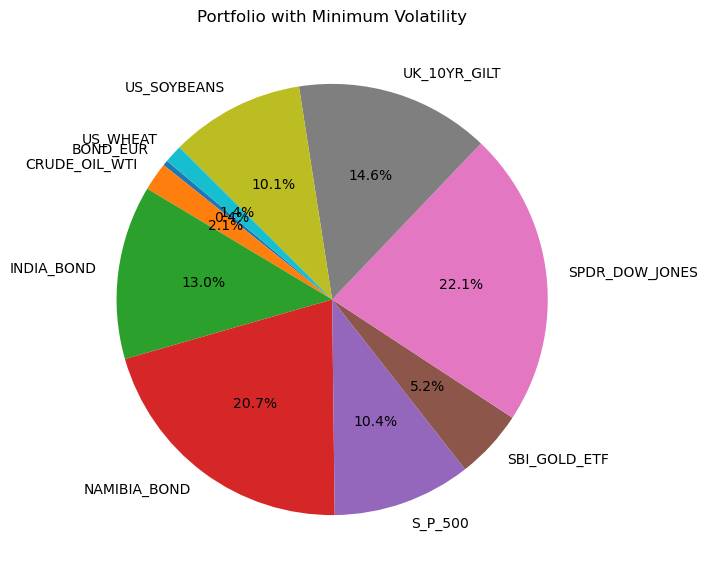

In [26]:
plot_portfolio_allocation(min_volatility_portfolio(results, weights_record)[2], 'Portfolio with Minimum Volatility')


## CAPM formula utilization and calculation of CML 

- We are using S&P 500 data as measure of how the market is varying to get the Rf for CAPM

In [27]:
market_log_returns = log_returns['S_P_500']
betas = {}

for asset in log_returns.columns:
    if asset != 'S_P_500':  # Exclude the market itself
        covariance = log_returns[asset].cov(market_log_returns)
        market_variance = market_log_returns.var()
        betas[asset] = covariance / market_variance


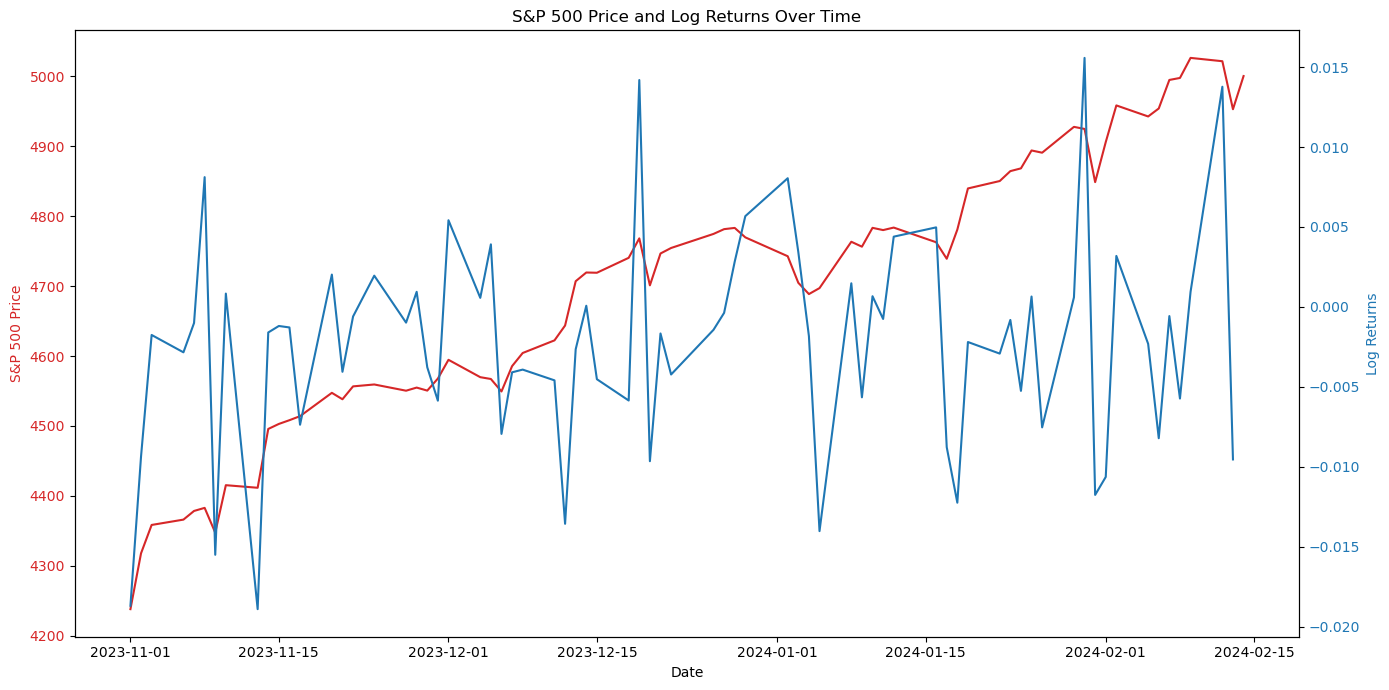

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming s_p_500 is already loaded with 'Price' as one of the columns and indexed by 'Date'
# Recalculating the log returns for S&P 500 for clarity
s_p_500['Log_Returns'] = np.log(s_p_500['Price'] / s_p_500['Price'].shift(1))

# Plotting S&P 500 Price and Log Returns on separate subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Price', color=color)
ax1.plot(s_p_500.index, s_p_500['Price'], color=color, label='S&P 500 Price')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Log Returns', color=color)  
ax2.plot(s_p_500.index, s_p_500['Log_Returns'], color=color, label='S&P 500 Log Returns')
ax2.tick_params(axis='y', labelcolor=color)

# Adding a title and customizing layout
plt.title('S&P 500 Price and Log Returns Over Time')
fig.tight_layout()  

plt.show()


In [29]:
R_f = 0.010
R_m = market_log_returns.mean() * 252  # Annualizing the average daily log return of the market

expected_returns = {}
for asset, beta in betas.items():
    expected_returns[asset] = R_f + beta * (R_m - R_f)


In [30]:
for asset, exp_return in expected_returns.items():
    print(f"{asset}: Expected Annual Return = {exp_return:.2%}")


BOND_EUR: Expected Annual Return = 44.27%
CRUDE_OIL_WTI: Expected Annual Return = -7.39%
INDIA_BOND: Expected Annual Return = 0.76%
NAMIBIA_BOND: Expected Annual Return = -1.46%
SBI_GOLD_ETF: Expected Annual Return = 5.55%
SPDR_DOW_JONES: Expected Annual Return = 1.80%
UK_10YR_GILT: Expected Annual Return = 6.97%
US_SOYBEANS: Expected Annual Return = -1.51%
US_WHEAT: Expected Annual Return = 3.54%


## High Positive Returns
- BOND_EUR: 44.27%
This asset shows an exceptionally high expected return, indicating potential underpricing or an overly optimistic assessment of future growth. High expected returns could also reflect a high beta, suggesting significant volatility and risk.

## Negative Returns
- CRUDE_OIL_WTI: -7.39%
- NAMIBIA_BOND: -1.46%
- US_SOYBEANS: -1.51%
Assets with negative expected returns are anticipated to underperform the risk-free rate after adjusting for market risk. This could signal overpricing, or that these assets face specific challenges that could impact their future performance negatively.

## Moderate Positive Returns
- SBI_GOLD_ETF: 5.55%
- SPDR_DOW_JONES: 1.80%
- US_WHEAT: 3.54%
These assets offer moderate expected returns, potentially indicating a balanced risk-return profile. They could serve as stable components in a diversified portfolio, especially in contrast to the more volatile assets.

## Notably Positive Returns
- UK_10YR_GILT: 6.97%
A government bond offering returns significantly above the risk-free rate suggests either an expectation of rising interest rates or increased demand for safe-haven assets, depending on the current economic context.

## Close to Neutral or Slightly Positive
- INDIA_BOND: 0.76%
This asset's expected return is close to the risk-free rate, indicating low relative risk but also limited growth potential. It may serve as a conservative investment, especially for risk-averse strategies.

# CML and TANGENT LINE TO CML based on CAPM

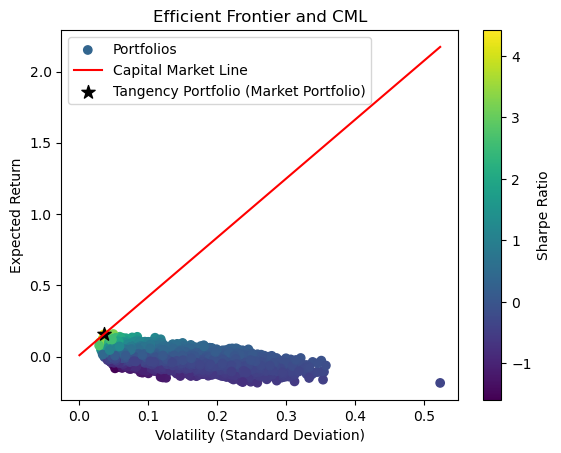

In [31]:
# Given values from your analysis

# Calculating CML
# The market portfolio's expected return and volatility are rp_max_sharpe and sdp_max_sharpe respectively
E_R_m = rp_max_sharpe
sigma_m = sdp_max_sharpe

# Range of sigma for plotting CML
sigma_range = np.linspace(0, max(results[0]), 100)
# CML equation: E(R_p) = R_f + (E(R_m) - R_f) / sigma_m * sigma
E_R_p_cml = R_f + (E_R_m - R_f) / sigma_m * sigma_range

# Plotting Efficient Frontier
plt.scatter(results[0], results[1], c=results[2], cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')


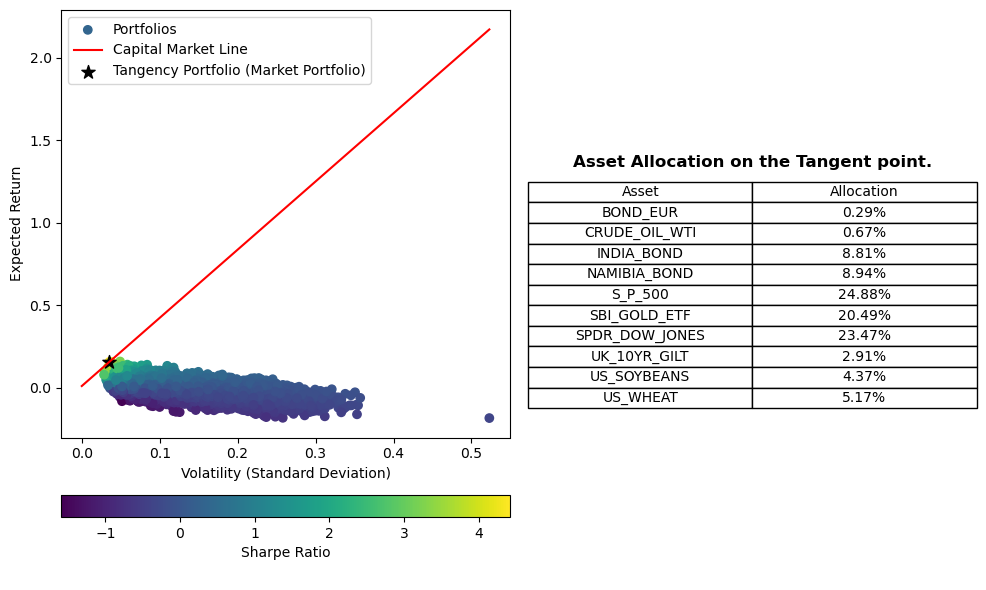

In [33]:
import matplotlib.pyplot as plt
import numpy as np
E_R_m = rp_max_sharpe
sigma_m = sdp_max_sharpe
sigma_range = np.linspace(0, max(results[0]), 100)
E_R_p_cml = R_f + (E_R_m - R_f) / sigma_m * sigma_range

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))  # Create two subplots side by side

# Plotting on the first subplot
scatter = ax1.scatter(results[0], results[1], c=results[2], cmap='viridis', label='Portfolios')
ax1.plot(sigma_range, E_R_p_cml, color='red', label='Capital Market Line')
ax1.scatter(sigma_m, E_R_m, marker='*', color='black', s=100, label='Tangency Portfolio (Market Portfolio)')
ax1.set_xlabel('Volatility (Standard Deviation)')
ax1.set_ylabel('Expected Return')
ax1.legend()

# Adjusting the color bar to be at the bottom of the plots
cbar = plt.colorbar(scatter, ax=ax1, orientation='horizontal', pad=0.1)
cbar.set_label('Sharpe Ratio')
# Setting up the table on the second subplot (ax2)
cell_text = [[name, f"{weight*100:.2f}%"] for name, weight in zip(asset_names, max_sharpe_allocation)]
cell_text.insert(0, ["Asset", "Allocation"])  # Add header row
table = ax2.table(cellText=cell_text, cellLoc='center', loc='center')
# Adding a title directly above the table
ax2.text(0.5, .72, 'Asset Allocation on the Tangent point.', horizontalalignment='center', verticalalignment='bottom', transform=ax2.transAxes, fontsize=12,  fontweight='bold')
ax2.axis('off')  # Hide axes for the table

plt.tight_layout()
plt.show()


### Tangency Point (Market Portfolio): 
This represents the portfolio with the highest Sharpe Ratio, indicating the best possible risk-adjusted returns. It's the optimal portfolio of risky assets before considering the risk-free asset for investment.

## Choose 3 of your risky assets and calculate individual security market lines.
- US_SOYBEANS
- CRUDE_OIL_WTI
- BOND_EUR


In [34]:
betas

{'BOND_EUR': 1.2639780343075993,
 'CRUDE_OIL_WTI': -0.24496256235595712,
 'INDIA_BOND': -0.007066204383891801,
 'NAMIBIA_BOND': -0.07183315570517555,
 'SBI_GOLD_ETF': 0.13294590767183373,
 'SPDR_DOW_JONES': 0.02333358899651221,
 'UK_10YR_GILT': 0.1744513162043074,
 'US_SOYBEANS': -0.07330382568054904,
 'US_WHEAT': 0.07420164873465657}

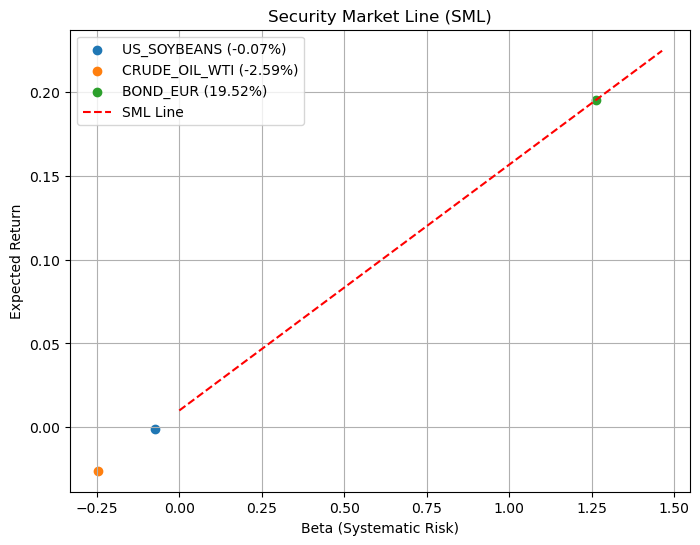

In [35]:
# Calculate expected return for each asset using CAPM
selectiveBetas={'US_SOYBEANS': betas['US_SOYBEANS'], 'CRUDE_OIL_WTI': betas['CRUDE_OIL_WTI'], 'BOND_EUR': betas['BOND_EUR']}
expected_returns = {asset: R_f + beta * (E_R_m - R_f) for asset, beta in selectiveBetas.items()}

# Plotting
plt.figure(figsize=(8, 6))
for asset, beta in selectiveBetas.items():
    plt.scatter(beta, expected_returns[asset], label=f'{asset} ({expected_returns[asset]*100:.2f}%)')

# Plot the SML
beta_range = [0, max(selectiveBetas.values()) + 0.2]
sml_line = [R_f + (E_R_m - R_f) * beta for beta in beta_range]
plt.plot(beta_range, sml_line, 'r--', label='SML Line')

plt.xlabel('Beta (Systematic Risk)')
plt.ylabel('Expected Return')
plt.title('Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()

##### Calculate relevant performance measures with Sharpe Ratio for each of your optimized portfolios and compare them to individual assets. Discuss the implications of these measures in evaluating portfolio performance.

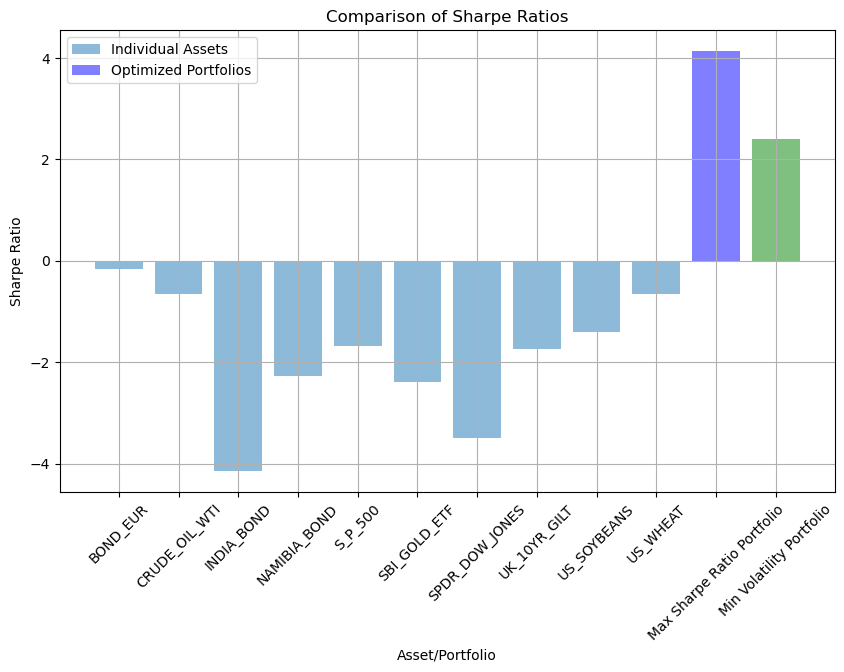

In [39]:
# Calculate Sharpe Ratio for optimized portfolios
sdp_max_sharpe, rp_max_sharpe, max_sharpe_allocation = max_sharpe_ratio_portfolio(results, weights_record)
sdp_min_vol, rp_min_vol, min_vol_allocation = min_volatility_portfolio(results, weights_record)

max_sharpe_ratio_sharpe = (rp_max_sharpe - risk_free_rate) / sdp_max_sharpe
min_volatility_sharpe = (rp_min_vol - risk_free_rate) / sdp_min_vol

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(individual_asset_sharpe.index, individual_asset_sharpe.values, label='Individual Assets', alpha=0.5)
plt.bar(['Max Sharpe Ratio Portfolio', 'Min Volatility Portfolio'], [max_sharpe_ratio_sharpe, min_volatility_sharpe], color=['blue', 'green'], label='Optimized Portfolios', alpha=0.5)
plt.xlabel('Asset/Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Comparison of Sharpe Ratios')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### INFERENCE:
- The negative sharpe ratio of the individual assets indicate that the they are not providing adequate returns relative to the level of risk they carry. 
- The maximum Sharpe ratio portfolio and the minimum volatility portfolio, have positive Sharpe Ratios, while individual assets have negative Sharpe Ratios, it indicates that the optimization process has successfully improved the risk-adjusted returns compared to holding individual assets.